<a href="https://colab.research.google.com/github/Rioba-Ian/Statistics/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = pd.read_csv('/content/Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


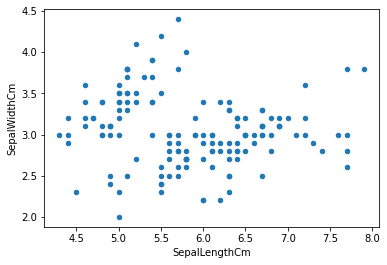

In [5]:
iris.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')
plt.show()

Visualizing using pandas andrew curves

andrew curves have the functional form:
<br>
f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) + x_4 sin(2t) + x_5 cos(2t) + ...

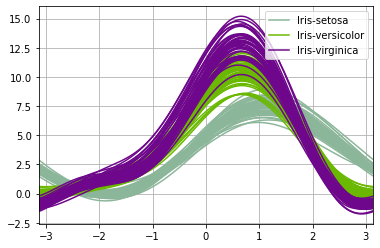

In [6]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop('Id', axis=1), 'Species')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = iris.iloc[:, :-1].values
y = iris.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Supervised ml algorithms ar trained to find patterns using a dataset. It takes what has been learned in the past and then applies that to the new data. Supervised learning uses labelled data to predict future patterns and events. 

<br>

Supervised learning is divided into:

* Classification: predicts the categorical class labels, which are discrete and unordered. It involves a learning step and a classification step. Decision tree classifier, random forest, naive bayes classifer..
* Regrssion: determining r/ship between two or more variables. 


A decision tree classifier is used to create a training model which is usedto prdict the class or value of target variabls by learning decision rules gotten from training data.

<br>

It solves the problem using representation. Each node is tree corresponds an attribute and each leaf node represents to a class label.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
classifier = DecisionTreeClassifier()

In [12]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy is', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667


In [14]:
import seaborn as sns 

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['setosa', 'versicolor', 'virginica'], columns=['setosa', 'versicolor', 'virginica'])

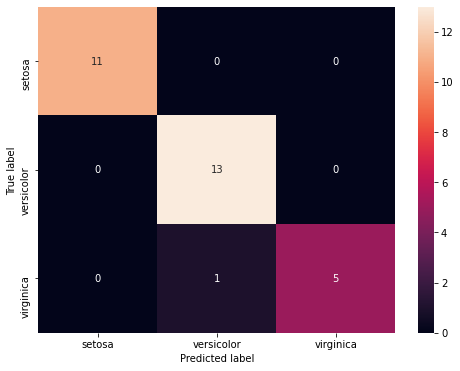

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.show()

Unsupervised Learning
<br>
Is used against data without historical labels. The system is not subjected to pr-set outputs, correlations between inputs and outputs. The algorithmmust figur out for itself and does not have storage reference points. The goal is to explore data and find some patterns.
It can be classified into:

* Clustering: dividing population into several groups. 
* Association: is unsupervised method for finding the relationships between varibales in a large database. 

K-means clustering

<br>

The goal is to find groups in the data, with the no of groups represented by varible k. The algorithm works iteratively to assign each data point to one of the k groups based on the features that are given. 

<br>

outputs are:
* K centroids: each centorid for each of the k clusters identified from the dataset.

* Labels for the training data; complete dataset labelled to ensure each data point is assigned to one of the clusters.

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state= 0)

In [18]:
y_kmeans = kmeans.fit_predict(x)

In [19]:
print(kmeans.cluster_centers_)

[[125.5     6.588   2.974   5.552   2.026]
 [ 25.5     5.006   3.418   1.464   0.244]
 [ 75.5     5.936   2.77    4.26    1.326]]


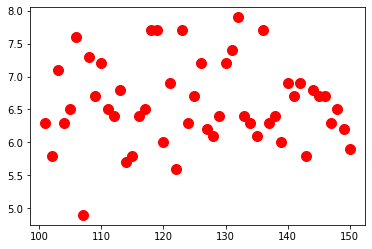

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s=100, c='red', label='Iris-Setosa')

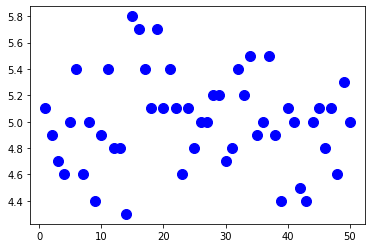

In [21]:
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s=100, c='blue', label='Iris-versicolor')

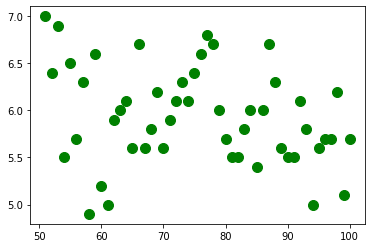

In [22]:
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s=100, c='green', label='Iris-virginica')

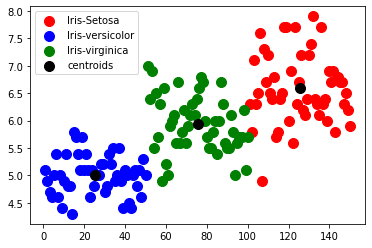

In [26]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1], s=100, c='red', label='Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100,c='black', label='centroids')
plt.legend()
plt.show()